In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing relevant libraries

In [2]:
data=pd.read_csv('loan.csv')
#importing dataset

c:\Users\mash1006\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
s=data.shape
n=data.isnull().sum()
#checking the shape of dataset to know of no. of drivers available & checking the no. of null enteries in the dataset as part of data cleaning process 

In [131]:
data1=data.dropna(axis=1,how='all')
n1=data1.isnull().sum()

In [268]:
data2=data1.drop(data.columns[[10,11,51,19,28,29,47,4,34,18,32,15,7,46,40,41,51]],axis=1)
n2=data2.isnull().sum()

0.0

In [313]:
nan=float('NaN')
data2.replace(0,nan,inplace=True)
data2.replace('NA',nan,inplace=True)
data3=data2.dropna(axis=1,thresh=21000)
data3=data3.drop(['title','zip_code','id','loan_amnt','application_type','grade','member_id','last_credit_pull_d','term','int_rate','home_ownership','pymnt_plan','purpose','addr_state','earliest_cr_line','initial_list_status','funded_amnt','last_pymnt_d','total_pymnt','total_pymnt_inv'],axis=1)
n3=data3.isnull().sum()
#replacing null values with NaN & dropping irrelavant drivers on the basis of their deifnition and correlation matrix fromed through heatmap showing above

In [314]:
for i in data3.columns:
    print(i,data3[i].nunique())

n3=data3.isnull().sum()

sub_grade 35
annual_inc 5318
verification_status 3
loan_status 3
dti 2867
open_acc 40
revol_util 1089


In [298]:
data3.dtypes


sub_grade               object
annual_inc             float64
verification_status     object
loan_status             object
dti                    float64
open_acc                 int64
revol_util             float64
dtype: object

In [317]:
data3['sub_grade']=data3['sub_grade'].astype(str)
data3['verification_status']=data3['verification_status'].astype(str)
data3['loan_status']=data3['loan_status'].astype(str)
data3['revol_util']=data3['revol_util'].str.replace('%','').astype(float)

In [323]:
rev=data3['revol_util'].median()
data3['revol_util']=data3['revol_util'].replace('nan',rev)
dti=data3['dti'].median()
data3['dti']=data3['dti'].replace('nan',dti)
n3=data3.isnull().sum()

<function matplotlib.pyplot.show(close=None, block=None)>

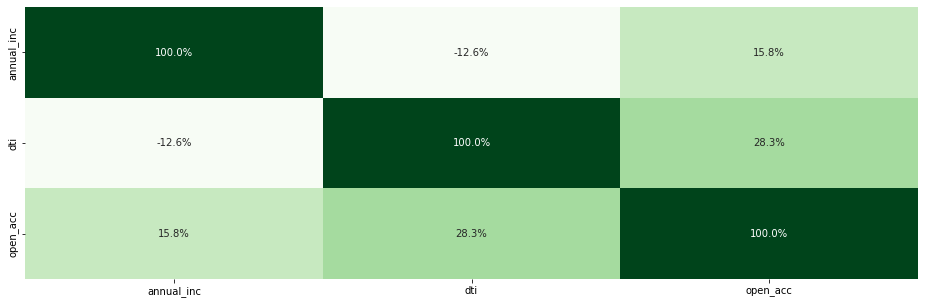

In [262]:
plt.figure(figsize = (16,5))
sns.heatmap(data3.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False)
plt.show